<a href="https://colab.research.google.com/github/SaraWestWA/DS-Unit-1-Build/blob/master/SW_Honey_WA_state.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Washington state honey production and honeybee health 1987-2019


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import * #this enables yticks
# import pandas.util.testing as tm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Importing Data, Examining Data & Removing Extraneous Columns & Rows

In [2]:
#US honey production statistics 1987-2019
# Import data originally from USDA site
url='https://raw.githubusercontent.com/SaraWestWA/DS-Unit-1-Build/master/BFFFE401-A356-3D6D-8B47-313C0C09870E.csv'

In [3]:
#look at data
raw_honey = pd.read_csv(url,sep=None, thousands=',', engine='python')
print(raw_honey.shape)
raw_honey.head()

(4311, 21)


,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,County ANSI,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,SURVEY,2019,MARKETING YEAR,NaN,STATE,ALABAMA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,HONEY,"HONEY - PRODUCTION, MEASURED IN $",TOTAL,NOT SPECIFIED,941000,NaN
1,SURVEY,2019,MARKETING YEAR,NaN,STATE,ALABAMA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,HONEY,"HONEY - PRODUCTION, MEASURED IN LB",TOTAL,NOT SPECIFIED,294000,NaN
2,SURVEY,2019,MARKETING YEAR,NaN,STATE,ALABAMA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,HONEY,"HONEY - PRODUCTION, MEASURED IN LB / COLONY",TOTAL,NOT SPECIFIED,42,NaN
3,SURVEY,2019,MARKETING YEAR,NaN,STATE,ARIZONA,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,HONEY,"HONEY - PRODUCTION, MEASURED IN $",TOTAL,NOT SPECIFIED,2084000,NaN
4,SURVEY,2019,MARKETING YEAR,NaN,STATE,ARIZONA,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,HONEY,"HONEY - PRODUCTION, MEASURED IN LB",TOTAL,NOT SPECIFIED,1058000,NaN


In [4]:
# keep only necessary columns
us_honey = pd.DataFrame.copy(raw_honey[['Year','State','Data Item','Value']])
print(us_honey.shape)
us_honey.head()

(4311, 4)


,Year,State,Data Item,Value
0,2019,ALABAMA,"HONEY - PRODUCTION, MEASURED IN $",941000
1,2019,ALABAMA,"HONEY - PRODUCTION, MEASURED IN LB",294000
2,2019,ALABAMA,"HONEY - PRODUCTION, MEASURED IN LB / COLONY",42
3,2019,ARIZONA,"HONEY - PRODUCTION, MEASURED IN $",2084000
4,2019,ARIZONA,"HONEY - PRODUCTION, MEASURED IN LB",1058000


In [5]:
# examine data types
us_honey.dtypes

Year          int64
State        object
Data Item    object
Value         int64
dtype: object

In [6]:
# check value counts
us_honey['Data Item'].value_counts()

HONEY - PRODUCTION, MEASURED IN $              1437
HONEY - PRODUCTION, MEASURED IN LB / COLONY    1437
HONEY - PRODUCTION, MEASURED IN LB             1437
Name: Data Item, dtype: int64

In [7]:
# check value counts
us_honey['Year'].value_counts().sort_index()

1987    147
1988    147
1989    147
1990    147
1991    135
1992    135
1993    135
1994    135
1995    135
1996    135
1997    132
1998    132
1999    132
2000    132
2001    135
2002    135
2003    135
2004    126
2005    126
2006    126
2007    126
2008    126
2009    123
2010    123
2011    123
2012    123
2013    120
2014    123
2015    123
2016    123
2017    123
2018    123
2019    123
Name: Year, dtype: int64

In [8]:
us_honey['State'].value_counts()

MISSISSIPPI       99
FLORIDA           99
MICHIGAN          99
SOUTH DAKOTA      99
MISSOURI          99
TENNESSEE         99
UTAH              99
KENTUCKY          99
TEXAS             99
OHIO              99
ALABAMA           99
LOUISIANA         99
WYOMING           99
ARKANSAS          99
COLORADO          99
WASHINGTON        99
NEBRASKA          99
KANSAS            99
NORTH CAROLINA    99
INDIANA           99
ARIZONA           99
IOWA              99
ILLINOIS          99
MINNESOTA         99
HAWAII            99
WISCONSIN         99
WEST VIRGINIA     99
MAINE             99
VERMONT           99
CALIFORNIA        99
IDAHO             99
PENNSYLVANIA      99
NEW JERSEY        99
OREGON            99
NEW YORK          99
MONTANA           99
GEORGIA           99
NORTH DAKOTA      99
VIRGINIA          99
OTHER STATES      87
NEW MEXICO        78
NEVADA            66
SOUTH CAROLINA    57
OKLAHOMA          51
MARYLAND          51
CONNECTICUT       12
NEW HAMPSHIRE     12
RHODE ISLAND 

In [9]:
# drop rows for states with fewer than 99 data entries
state_list=('OTHER STATES','NEW MEXICO', 'NEVADA', 'SOUTH CAROLINA', 'OKLAHOMA', 'MARYLAND','MASSACHUSETTS','RHODE ISLAND','NEW HAMPSHIRE','DELAWARE','CONNECTICUT')
for i in state_list:
  us_honey = us_honey[us_honey['State'] != i]
print(us_honey.shape)
us_honey['State'].value_counts().sort_index()

(3861, 4)


ALABAMA           99
ARIZONA           99
ARKANSAS          99
CALIFORNIA        99
COLORADO          99
FLORIDA           99
GEORGIA           99
HAWAII            99
IDAHO             99
ILLINOIS          99
INDIANA           99
IOWA              99
KANSAS            99
KENTUCKY          99
LOUISIANA         99
MAINE             99
MICHIGAN          99
MINNESOTA         99
MISSISSIPPI       99
MISSOURI          99
MONTANA           99
NEBRASKA          99
NEW JERSEY        99
NEW YORK          99
NORTH CAROLINA    99
NORTH DAKOTA      99
OHIO              99
OREGON            99
PENNSYLVANIA      99
SOUTH DAKOTA      99
TENNESSEE         99
TEXAS             99
UTAH              99
VERMONT           99
VIRGINIA          99
WASHINGTON        99
WEST VIRGINIA     99
WISCONSIN         99
WYOMING           99
Name: State, dtype: int64

## Simplifying State Data

In [10]:
# create a mask to select only $ Value rows
mask_dollars = us_honey['Data Item']== 'HONEY - PRODUCTION, MEASURED IN $'

# check shape
print((us_honey['State'].value_counts().sum())/3)
print(us_honey[mask_dollars].shape)
us_honey[mask_dollars].head()

1287.0
(1287, 4)


,Year,State,Data Item,Value
0,2019,ALABAMA,"HONEY - PRODUCTION, MEASURED IN $",941000
3,2019,ARIZONA,"HONEY - PRODUCTION, MEASURED IN $",2084000
6,2019,ARKANSAS,"HONEY - PRODUCTION, MEASURED IN $",1683000
9,2019,CALIFORNIA,"HONEY - PRODUCTION, MEASURED IN $",25085000
12,2019,COLORADO,"HONEY - PRODUCTION, MEASURED IN $",3150000


In [11]:
# create data frame for $ value
# this data was not used in project
us_honey_money = pd.DataFrame.copy(us_honey[mask_dollars])
us_honey_money = pd.DataFrame.copy(us_honey_money[['Year','State','Value']])

# rename value column
# How to do the below without using inplace?
us_honey_money.rename(columns={'Value': 'Value_USD'}, inplace=True)
us_honey_money.head()

,Year,State,Value_USD
0,2019,ALABAMA,941000
3,2019,ARIZONA,2084000
6,2019,ARKANSAS,1683000
9,2019,CALIFORNIA,25085000
12,2019,COLORADO,3150000


In [12]:
# create a mask to select only total pounds rows
mask_lbs = us_honey['Data Item']== 'HONEY - PRODUCTION, MEASURED IN LB'

us_honey_lbs = pd.DataFrame.copy(us_honey[mask_lbs])
us_honey_lbs = pd.DataFrame.copy(us_honey_lbs[['Year','State','Value']])

# rename value column
# How to do the below without using inplace?
us_honey_lbs.rename(columns={'Value': 'lbs'}, inplace=True)

print(us_honey_lbs.shape)
us_honey_lbs.head()

(1287, 3)


,Year,State,lbs
1,2019,ALABAMA,294000
4,2019,ARIZONA,1058000
7,2019,ARKANSAS,1100000
10,2019,CALIFORNIA,16080000
13,2019,COLORADO,1472000


In [13]:
# create a mask to select only pounds per colony rows
mask_colony = us_honey['Data Item']== 'HONEY - PRODUCTION, MEASURED IN LB / COLONY'

us_honey_colony = pd.DataFrame.copy(us_honey[mask_colony])
us_honey_colony = pd.DataFrame.copy(us_honey_colony[['Year','State','Value']])

# rename value column
# How to do the below without using inplace?
us_honey_colony.rename(columns={'Value': 'lbs_colony'}, inplace=True)

print(us_honey_colony.shape)
us_honey_colony.head()


(1287, 3)


,Year,State,lbs_colony
2,2019,ALABAMA,42
5,2019,ARIZONA,46
8,2019,ARKANSAS,55
11,2019,CALIFORNIA,48
14,2019,COLORADO,46


In [14]:
# merge money and pound dataframes back together
honey_money_lb=pd.merge(us_honey_money,us_honey_lbs)
honey_money_lb.head()

,Year,State,Value_USD,lbs
0,2019,ALABAMA,941000,294000
1,2019,ARIZONA,2084000,1058000
2,2019,ARKANSAS,1683000,1100000
3,2019,CALIFORNIA,25085000,16080000
4,2019,COLORADO,3150000,1472000


In [15]:
# merge pounds per colony with new dataframe
all_honey=pd.merge(honey_money_lb, us_honey_colony)
all_honey.head()

,Year,State,Value_USD,lbs,lbs_colony
0,2019,ALABAMA,941000,294000,42
1,2019,ARIZONA,2084000,1058000,46
2,2019,ARKANSAS,1683000,1100000,55
3,2019,CALIFORNIA,25085000,16080000,48
4,2019,COLORADO,3150000,1472000,46


In [16]:
# Create a new column for colonies per state
all_honey['colony_count']=all_honey['lbs']/all_honey['lbs_colony']
print(all_honey.dtypes)
all_honey

Year              int64
State            object
Value_USD         int64
lbs               int64
lbs_colony        int64
colony_count    float64
dtype: object


,Year,State,Value_USD,lbs,lbs_colony,colony_count
0,2019,ALABAMA,941000,294000,42,7000.0
1,2019,ARIZONA,2084000,1058000,46,23000.0
2,2019,ARKANSAS,1683000,1100000,55,20000.0
3,2019,CALIFORNIA,25085000,16080000,48,335000.0
4,2019,COLORADO,3150000,1472000,46,32000.0
...,...,...,...,...,...,...
1282,1987,VIRGINIA,576000,1200000,48,25000.0
1283,1987,WASHINGTON,1815000,4125000,55,75000.0
1284,1987,WEST VIRGINIA,706000,861000,41,21000.0
1285,1987,WISCONSIN,4284000,8924000,97,92000.0


## Creating Individual Dataframes for Each State & US Totals Rows

Most of this information is unused. However, it is an excellent starting place for expansion.

In [17]:
# create single interation of a sum row
year_mask = all_honey['Year']== 2019
all_honey[year_mask]
all_honey_2019 =all_honey[year_mask]

v=sum(all_honey[year_mask]['Value_USD'])
lb=sum(all_honey[year_mask]['lbs'])

new_row = [2019, 'USA',v,lb]
new_row

[2019, 'USA', 293352000, 154752000]

In [18]:
# Create total columns for each year
# include dummy cc column for joining
years=[]
for i in range(1987,2020):
  year_mask = all_honey['Year']== i
  all_honey[year_mask]
  v=sum(all_honey[year_mask]['Value_USD'])
  lb=sum(all_honey[year_mask]['lbs'])
  i_year=[]
  i_year.append(i)
  i_year.append(1)
  i_year.append((v))
  i_year.append(lb)
  i_year.append(0)
  i_year.append(i-1900)
  years.append(i_year)

years = np.array(years)
years

array([[     1987,         1, 115845000, 232279000,         0,        87],
       [     1988,         1, 109898000, 219443000,         0,        88],
       [     1989,         1,  88765000, 177040000,         0,        89],
       [     1990,         1, 105084000, 194096000,         0,        90],
       [     1991,         1, 121091000, 216947000,         0,        91],
       [     1992,         1, 119882000, 217860000,         0,        92],
       [     1993,         1, 121913000, 226843000,         0,        93],
       [     1994,         1, 113502000, 214321000,         0,        94],
       [     1995,         1, 142772000, 208017000,         0,        95],
       [     1996,         1, 175147000, 196073000,         0,        96],
       [     1997,         1, 146089000, 193077000,         0,        97],
       [     1998,         1, 144155000, 217777000,         0,        98],
       [     1999,         1, 121617000, 200656000,         0,        99],
       [     2000,       

In [19]:
# Create dataframe with years info above
years_df = pd.DataFrame(data=years, columns = ['Year','State','Value_USD','lbs','lbs_colony','cc'])
print(years_df.shape)
print(years_df.dtypes)
years_df

(33, 6)
Year          int64
State         int64
Value_USD     int64
lbs           int64
lbs_colony    int64
cc            int64
dtype: object


,Year,State,Value_USD,lbs,lbs_colony,cc
0,1987,1,115845000,232279000,0,87
1,1988,1,109898000,219443000,0,88
2,1989,1,88765000,177040000,0,89
3,1990,1,105084000,194096000,0,90
4,1991,1,121091000,216947000,0,91
5,1992,1,119882000,217860000,0,92
6,1993,1,121913000,226843000,0,93
7,1994,1,113502000,214321000,0,94
8,1995,1,142772000,208017000,0,95
9,1996,1,175147000,196073000,0,96


In [20]:
# change cc type to float for joining below
years_df['cc']=years_df['cc'].astype(float)
years_df.dtypes

Year            int64
State           int64
Value_USD       int64
lbs             int64
lbs_colony      int64
cc            float64
dtype: object

In [21]:
# Creating the dataframe with 'USA' in the State column rendered
# all dtypes objects which were resistant to changing to int64
# order changed to preserve datatypes
years_df['State'] = 'USA'
print(years_df.dtypes)
years_df.head()

Year            int64
State          object
Value_USD       int64
lbs             int64
lbs_colony      int64
cc            float64
dtype: object


,Year,State,Value_USD,lbs,lbs_colony,cc
0,1987,USA,115845000,232279000,0,87.0
1,1988,USA,109898000,219443000,0,88.0
2,1989,USA,88765000,177040000,0,89.0
3,1990,USA,105084000,194096000,0,90.0
4,1991,USA,121091000,216947000,0,91.0


In [22]:
# Create column for total colony count, doing this with the other columns
# rendered all columns to floats which were resistant to change
# the solution is the dummy column cc created above
colonies=[]
for i in range(1987,2020):
  colonies
  year_mask = all_honey['Year']== i
  all_honey[year_mask]
  cc=sum(all_honey[year_mask]['colony_count'])
  i_year=[]
  i_year.append(i-1900)
  i_year.append(cc)
  colonies.append(i_year)

colonies = np.array(colonies)
colonies

array([[8.700e+01, 3.238e+06],
       [8.800e+01, 3.289e+06],
       [8.900e+01, 3.444e+06],
       [9.000e+01, 3.126e+06],
       [9.100e+01, 3.137e+06],
       [9.200e+01, 2.977e+06],
       [9.300e+01, 2.810e+06],
       [9.400e+01, 2.722e+06],
       [9.500e+01, 2.598e+06],
       [9.600e+01, 2.525e+06],
       [9.700e+01, 2.578e+06],
       [9.800e+01, 2.586e+06],
       [9.900e+01, 2.601e+06],
       [1.000e+02, 2.566e+06],
       [1.010e+02, 2.508e+06],
       [1.020e+02, 2.534e+06],
       [1.030e+02, 2.570e+06],
       [1.040e+02, 2.517e+06],
       [1.050e+02, 2.375e+06],
       [1.060e+02, 2.362e+06],
       [1.070e+02, 2.412e+06],
       [1.080e+02, 2.310e+06],
       [1.090e+02, 2.465e+06],
       [1.100e+02, 2.659e+06],
       [1.110e+02, 2.459e+06],
       [1.120e+02, 2.504e+06],
       [1.130e+02, 2.608e+06],
       [1.140e+02, 2.701e+06],
       [1.150e+02, 2.617e+06],
       [1.160e+02, 2.727e+06],
       [1.170e+02, 2.633e+06],
       [1.180e+02, 2.776e+06],
       [

In [23]:
# Create colonies dataframe
colonies_df = pd.DataFrame(data=colonies, columns = ['cc','colony_count'])
print(colonies_df.shape)
print(colonies_df.dtypes)
colonies_df.head()

(33, 2)
cc              float64
colony_count    float64
dtype: object


,cc,colony_count
0,87.0,3238000.0
1,88.0,3289000.0
2,89.0,3444000.0
3,90.0,3126000.0
4,91.0,3137000.0


In [24]:
# Join colonies and years dataframe
all= years_df.merge(colonies_df,on='cc')
print(all.shape)
all.head()

(33, 7)


,Year,State,Value_USD,lbs,lbs_colony,cc,colony_count
0,1987,USA,115845000,232279000,0,87.0,3238000.0
1,1988,USA,109898000,219443000,0,88.0,3289000.0
2,1989,USA,88765000,177040000,0,89.0,3444000.0
3,1990,USA,105084000,194096000,0,90.0,3126000.0
4,1991,USA,121091000,216947000,0,91.0,3137000.0


In [25]:
# Create a new column for national pounds per colony
all['lbs_colony']=all['lbs']/all['colony_count']
print(all.dtypes)
all.head()

Year              int64
State            object
Value_USD         int64
lbs               int64
lbs_colony      float64
cc              float64
colony_count    float64
dtype: object


,Year,State,Value_USD,lbs,lbs_colony,cc,colony_count
0,1987,USA,115845000,232279000,71.735330,87.0,3238000.0
1,1988,USA,109898000,219443000,66.720280,88.0,3289000.0
2,1989,USA,88765000,177040000,51.405343,89.0,3444000.0
3,1990,USA,105084000,194096000,62.090851,90.0,3126000.0
4,1991,USA,121091000,216947000,69.157475,91.0,3137000.0


In [26]:
# Join all_honey and all(USA) dataframe
# cc column resisted dropping
honey=pd.concat([all_honey, all], ignore_index=True)
print(honey.shape)
honey

(1320, 7)


,Year,State,Value_USD,lbs,lbs_colony,colony_count,cc
0,2019,ALABAMA,941000,294000,42.000000,7000.0,NaN
1,2019,ARIZONA,2084000,1058000,46.000000,23000.0,NaN
2,2019,ARKANSAS,1683000,1100000,55.000000,20000.0,NaN
3,2019,CALIFORNIA,25085000,16080000,48.000000,335000.0,NaN
4,2019,COLORADO,3150000,1472000,46.000000,32000.0,NaN
...,...,...,...,...,...,...,...
1315,2015,USA,318811000,154599000,59.074895,2617000.0,115.0
1316,2016,USA,332732000,159925000,58.645031,2727000.0,116.0
1317,2017,USA,325043000,146963000,55.815799,2633000.0,117.0
1318,2018,USA,328331000,151841000,54.697767,2776000.0,118.0


In [27]:
# create list of state names
state_names=honey['State'].tolist()
state_names = list(dict.fromkeys(state_names))
state_names

In [28]:
# create a single interation before crafting a for loop to create all state
# dataframes
# create a mask to select only the rows for WA state
wa_mask = honey['State']== 'WASHINGTON'

# create WA state dataframe 
wa_honey = pd.DataFrame.copy(honey[wa_mask])
print(wa_honey.shape)
wa_honey.head()

(33, 7)


,Year,State,Value_USD,lbs,lbs_colony,colony_count,cc
35,2019,WASHINGTON,6010000,2835000,35.0,81000.0,NaN
74,2018,WASHINGTON,7119000,3311000,43.0,77000.0,NaN
113,2017,WASHINGTON,8455000,3465000,45.0,77000.0,NaN
152,2016,WASHINGTON,5851000,2940000,35.0,84000.0,NaN
191,2015,WASHINGTON,5782000,3212000,44.0,73000.0,NaN


In [30]:
# create function to create a dataframe for any state
# most of these dataframes were unused, good code = keep

state_dfs ={}
for i in state_names:
  i_mask = honey['State']== i

  # create  state dataframe 
  i_honey = pd.DataFrame.copy(honey[i_mask])
  state_dfs[i]=i_honey
state_dfs['WASHINGTON'].head()

,Year,State,Value_USD,lbs,lbs_colony,colony_count,cc
35,2019,WASHINGTON,6010000,2835000,35.0,81000.0,NaN
74,2018,WASHINGTON,7119000,3311000,43.0,77000.0,NaN
113,2017,WASHINGTON,8455000,3465000,45.0,77000.0,NaN
152,2016,WASHINGTON,5851000,2940000,35.0,84000.0,NaN
191,2015,WASHINGTON,5782000,3212000,44.0,73000.0,NaN


## Explore Statistics

In [31]:
# General Statistics, before USA total columns
all_honey.describe()

,Year,Value_USD,lbs,lbs_colony,colony_count
count,1287.000000,1.287000e+03,1.287000e+03,1287.000000,1287.000000
mean,2003.000000,5.116256e+06,4.648887e+06,61.456099,68919.968920
std,9.525606,8.586217e+06,7.049993e+06,21.880406,95026.421622
min,1987.000000,8.900000e+04,1.200000e+05,19.000000,3000.000000
25%,1995.000000,9.435000e+05,6.325000e+05,46.000000,12000.000000
50%,2003.000000,2.109000e+06,1.980000e+06,59.000000,35000.000000
75%,2011.000000,5.126500e+06,4.675000e+06,74.000000,80000.000000
max,2019.000000,8.385900e+07,4.641000e+07,190.000000,620000.000000


In [32]:
# find the extremes of production

print(all_honey[['lbs_colony']].idxmax())
print(all_honey.iloc[1254:1256])

print(all_honey[['lbs_colony']].idxmin())
all_honey.iloc[645:647]

lbs_colony    1255
dtype: int64
      Year    State  Value_USD      lbs  lbs_colony  colony_count
1254  1987  GEORGIA    2462000  4560000          38      120000.0
1255  1987   HAWAII     752000  1710000         190        9000.0
lbs_colony    646
dtype: int64


,Year,State,Value_USD,lbs,lbs_colony,colony_count
645,2003,NEBRASKA,4595000,3330000,74,45000.0
646,2003,NEW JERSEY,304000,190000,19,10000.0


In [33]:
# create a function to calculate the mean number of lbs, colonies, lbs per
# colony, begin with one state, using df made in single interation above
print(wa_honey.shape)
print(wa_honey['lbs_colony'].sum())
print(wa_honey['lbs_colony'].mean())

(33, 7)
1582.0
47.93939393939394


In [34]:
# create function to create averages for each state
state_mean_lb_c ={}
state_mean_lb ={}
# state_colony mean
for i in state_names:
   meani= state_dfs[i]
   i_mean_lb_c=meani['lbs_colony'].mean()
   i_mean_lb=meani['lbs'].mean()
   state_mean_lb_c[i]=i_mean_lb_c
   state_mean_lb[i]=i_mean_lb

print(state_mean_lb_c['WASHINGTON'])
state_mean_lb['WASHINGTON']

47.93939393939394


3036727.272727273

In [35]:
# Dataframe of average pounds per colony by state for entire duration
# Hawaii highest average
# Maine lowest average
# Washington ranks 23 out of 33
df_mean_lbs = pd.DataFrame(state_mean_lb_c.items(), columns=['State','ave_lb_colony'])
df_mean_lbs.sort_values(by=['ave_lb_colony'],ascending=False)

,State,ave_lb_colony
7,HAWAII,115.515152
14,LOUISIANA,93.303030
25,NORTH DAKOTA,86.939394
20,MONTANA,82.151515
18,MISSISSIPPI,79.393939
5,FLORIDA,78.454545
29,SOUTH DAKOTA,77.636364
17,MINNESOTA,76.242424
37,WISCONSIN,73.636364
31,TEXAS,72.727273


##Explore correlation for Washington state


In [41]:
# WA basic statistics
state_dfs['WASHINGTON'].describe()

,Year,Value_USD,lbs,lbs_colony,colony_count,cc
count,33.00000,3.300000e+01,3.300000e+01,33.000000,33.000000,0.0
mean,2003.00000,3.609848e+06,3.036727e+06,47.939394,64212.121212,NaN
std,9.66954,2.039655e+06,5.265943e+05,7.557858,11542.740077,NaN
min,1987.00000,1.405000e+06,2.024000e+06,35.000000,46000.000000,NaN
25%,1995.00000,2.009000e+06,2.691000e+06,44.000000,56000.000000,NaN
50%,2003.00000,3.132000e+06,2.958000e+06,46.000000,62000.000000,NaN
75%,2011.00000,5.207000e+06,3.465000e+06,54.000000,73000.000000,NaN
max,2019.00000,8.455000e+06,4.400000e+06,63.000000,85000.000000,NaN


In [36]:
# Join WA & USA dataframes for correlation
WA_USA= state_dfs['WASHINGTON'].merge(state_dfs['USA'],on='Year')
print(WA_USA.shape)

df_WA_USA=pd.DataFrame.copy(WA_USA[['Year','State_x','State_y',
                                    'lbs_x','lbs_y',
                                    'lbs_colony_x',
                                  'lbs_colony_y',
                                  'colony_count_x','colony_count_y']])
df_WA_USA.head(3)

(33, 13)


,Year,State_x,State_y,lbs_x,lbs_y,lbs_colony_x,lbs_colony_y,colony_count_x,colony_count_y
0,2019,WASHINGTON,USA,2835000,154752000,35.0,55.947939,81000.0,2766000.0
1,2018,WASHINGTON,USA,3311000,151841000,43.0,54.697767,77000.0,2776000.0
2,2017,WASHINGTON,USA,3465000,146963000,45.0,55.815799,77000.0,2633000.0


In [37]:
# generate correlation matrix

cor_df_WA_USA=df_WA_USA.corr()
cor_df_WA_USA

,Year,lbs_x,lbs_y,lbs_colony_x,lbs_colony_y,colony_count_x,colony_count_y
Year,1.000000,-0.452328,-0.840168,-0.551186,-0.557010,0.103315,-0.566043
lbs_x,-0.452328,1.000000,0.472598,0.438745,0.101503,0.558555,0.596148
lbs_y,-0.840168,0.472598,1.000000,0.493840,0.778375,-0.001693,0.491153
lbs_colony_x,-0.551186,0.438745,0.493840,1.000000,0.634111,-0.491317,-0.071552
lbs_colony_y,-0.557010,0.101503,0.778375,0.634111,1.000000,-0.468602,-0.158679
colony_count_x,0.103315,0.558555,-0.001693,-0.491317,-0.468602,1.000000,0.615025
colony_count_y,-0.566043,0.596148,0.491153,-0.071552,-0.158679,0.615025,1.000000


In [38]:
# generate correlation matrix for WA
WA=state_dfs['WASHINGTON'][['Year','colony_count','lbs','lbs_colony']]
WA.columns=['Year','Colonies','Pounds','Pounds/Colony']
cor_WA=WA.corr()
cor_WA

,Year,Colonies,Pounds,Pounds/Colony
Year,1.000000,0.103315,-0.452328,-0.551186
Colonies,0.103315,1.000000,0.558555,-0.491317
Pounds,-0.452328,0.558555,1.000000,0.438745
Pounds/Colony,-0.551186,-0.491317,0.438745,1.000000


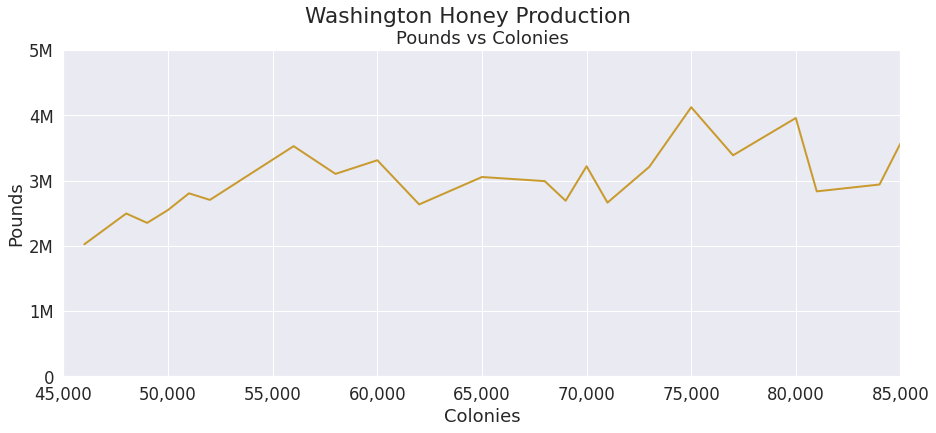

In [39]:
# Plot Washington pounds vs colonies
sns.set(font_scale=1.5)
# call out correct information
ax10 = WA.groupby('Colonies')['Pounds'].mean()
ax10.plot(xlim=(45000,85000),ylim=(0,5000000), figsize=(15,6), color = '#c99b2e', linewidth =2,);

# x axis labels
locs,labels = xticks()
xticks(locs, ['45,000','50,000','55,000','60,000','65,000','70,000','75,000','80,000','85,000','90,000'])

# y axis labels
locs,labels = yticks()
yticks(locs, [0,'1M','2M','3M','4M','5M'])

plt.suptitle('Washington Honey Production')
plt.title('Pounds vs Colonies')
ylabel('Pounds')


In [45]:
# Sort values to find years of highest and lowest colony count
# colony min 46,000, 2007
# colony max 85,000, 1991

WA_df =state_dfs['WASHINGTON']
WA_df.sort_values(by=['colony_count'])

,Year,State,Value_USD,lbs,lbs_colony,colony_count,cc
503,2007,WASHINGTON,2530000,2024000,44.0,46000.0,NaN
737,2001,WASHINGTON,1797000,2496000,52.0,48000.0,NaN
542,2006,WASHINGTON,3160000,2548000,52.0,49000.0,NaN
464,2008,WASHINGTON,3256000,2156000,44.0,49000.0,NaN
698,2002,WASHINGTON,3239000,2550000,51.0,50000.0,NaN
581,2005,WASHINGTON,2833000,2805000,55.0,51000.0,NaN
815,1999,WASHINGTON,1560000,2600000,50.0,52000.0,NaN
776,2000,WASHINGTON,1629000,2808000,54.0,52000.0,NaN
620,2004,WASHINGTON,3457000,3528000,63.0,56000.0,NaN
854,1998,WASHINGTON,1893000,2958000,51.0,58000.0,NaN


## Graphs

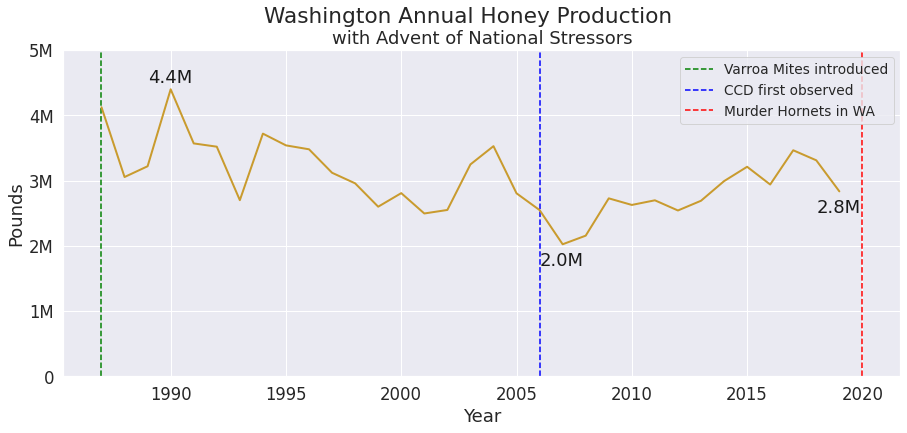

In [42]:
# Plot Washington total honey production
sns.set(font_scale=1.5)
# call out correct information
ax5 = state_dfs['WASHINGTON'].groupby('Year')['lbs'].mean()
ax5.plot(ylim=(0,5000000), figsize=(15,6), color = '#c99b2e', linewidth =2,label= '_nolegend_');

#add vertical markers with advent of threats
plt.vlines(x=1987, ymin=0, ymax=5000000, linestyles='dashed', color = 'green', label='Varroa Mites introduced',data=None)
plt.vlines(x=2006, ymin=0, ymax=5000000, linestyles='dashed', color = 'blue', label='CCD first observed',data=None)
plt.vlines(x=2020, ymin=0, ymax=5000000, linestyles='dashed', color = 'red', label='Murder Hornets in WA',data=None)

# y axis labels
locs,labels = yticks()
yticks(locs, [0,'1M','2M','3M','4M','5M'])

plt.suptitle('Washington Annual Honey Production')
plt.title('with Advent of National Stressors')
ylabel('Pounds')

plt.text(1989,4500000,s='4.4M', fontsize=18,  color = "k")
plt.text(2006,1700000,s='2.0M', fontsize=18,  color = "k")
plt.text(2018,2500000,s='2.8M', fontsize=18,  color = "k");

sns.set(font_scale=1.25)
plt.legend(loc='best');

In [43]:
# Sort values to find years of highest and lowest lbs per colony production
# lbs min 35, 2016 & 2019
# lbs max 63, 2004

WA_df =state_dfs['WASHINGTON']
WA_df.sort_values(by=['lbs_colony'])

,Year,State,Value_USD,lbs,lbs_colony,colony_count,cc
35,2019,WASHINGTON,6010000,2835000,35.0,81000.0,NaN
152,2016,WASHINGTON,5851000,2940000,35.0,84000.0,NaN
386,2010,WASHINGTON,4124000,2627000,37.0,71000.0,NaN
347,2011,WASHINGTON,5207000,2698000,38.0,71000.0,NaN
269,2013,WASHINGTON,6189000,2691000,39.0,69000.0,NaN
308,2012,WASHINGTON,6050000,2542000,41.0,62000.0,NaN
1127,1991,WASHINGTON,2035000,3570000,42.0,85000.0,NaN
74,2018,WASHINGTON,7119000,3311000,43.0,77000.0,NaN
1088,1992,WASHINGTON,2042000,3520000,44.0,80000.0,NaN
464,2008,WASHINGTON,3256000,2156000,44.0,49000.0,NaN


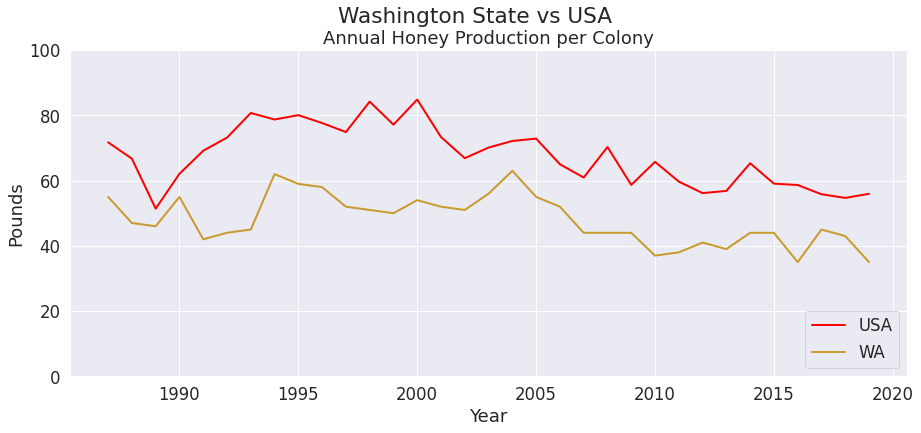

In [44]:
# A closer look pounds per colony WA vs USA

sns.set(font_scale=1.5)
# call out correct data
ax1 = state_dfs['WASHINGTON'].groupby('Year')['lbs_colony'].mean() #focus state
ax2 = state_dfs['USA'].groupby('Year')['lbs_colony'].mean() #nation

#plot order rearranged for the legend
ax2.plot(figsize=(15,6),color='red', linewidth = 2,label= "USA");
ax1.plot(ylim=(0,100), figsize=(15,6), color = '#c99b2e', linewidth = 2,label='WA',);

plt.suptitle('Washington State vs USA')
plt.title('Annual Honey Production per Colony')
plt.ylabel('Pounds')
plt.legend(loc="lower right");

In [46]:
# Sort values to find years of highest and lowest total production
# lbs min 2.0M in 2007
# lbs max 4.4M in 1990
# lbs 2.8M in 2019

WA_df =state_dfs['WASHINGTON']
WA_df.sort_values(by=['lbs'])

,Year,State,Value_USD,lbs,lbs_colony,colony_count,cc
503,2007,WASHINGTON,2530000,2024000,44.0,46000.0,NaN
464,2008,WASHINGTON,3256000,2156000,44.0,49000.0,NaN
737,2001,WASHINGTON,1797000,2496000,52.0,48000.0,NaN
308,2012,WASHINGTON,6050000,2542000,41.0,62000.0,NaN
542,2006,WASHINGTON,3160000,2548000,52.0,49000.0,NaN
698,2002,WASHINGTON,3239000,2550000,51.0,50000.0,NaN
815,1999,WASHINGTON,1560000,2600000,50.0,52000.0,NaN
386,2010,WASHINGTON,4124000,2627000,37.0,71000.0,NaN
269,2013,WASHINGTON,6189000,2691000,39.0,69000.0,NaN
347,2011,WASHINGTON,5207000,2698000,38.0,71000.0,NaN


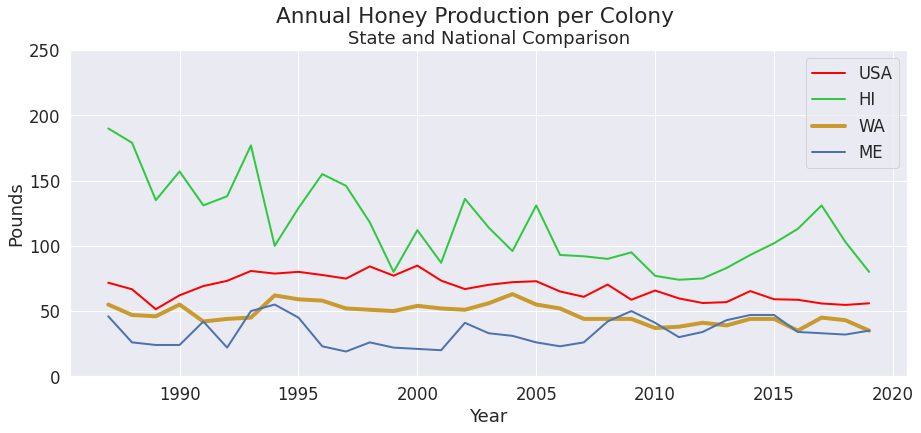

In [47]:
# plot to compare pounds per colony states vs nation
# graph excluded from final project, extraneous information
sns.set(font_scale=1.5)
# call out correct data
ax1 = state_dfs['WASHINGTON'].groupby('Year')['lbs_colony'].mean() #focus state
ax2 = state_dfs['USA'].groupby('Year')['lbs_colony'].mean() #nation
ax3 = state_dfs['HAWAII'].groupby('Year')['lbs_colony'].mean() #highest mean production
ax4 = state_dfs['MAINE'].groupby('Year')['lbs_colony'].mean() #lowest mean production

#plot order rearranged for the legend
ax2.plot(figsize=(15,6),color='red', linewidth = 2,label= "USA");
ax3.plot(figsize=(15,6), color = '#2ec93e',linewidth = 2, label='HI');
ax1.plot(ylim=(0,250), figsize=(15,6), color = '#c99b2e', linewidth = 4,label='WA',);
ax4.plot(figsize=(15,6), linewidth =2, label= "ME");

plt.suptitle('Annual Honey Production per Colony')
plt.title('State and National Comparison')
plt.ylabel('Pounds')
plt.legend(loc="upper right");